In [2]:
import pandas as pd
import matplotlib.pyplot as plt

feature_name_df = pd.read_csv('./UCI HAR Dataset/features.txt', sep='\s',
                              header=None,names=['column_index','column_name']) # \s+는 하나 이상의 공백을 뜻한다.
# header 는 컬럼명이 있는지를 확인, names는 컬럼명을 추가
feature_name = feature_name_df.iloc[:,1].values.tolist() # 리스트 객체로
feature_name[:10]

/var/folders/dj/074406ws2d7f7vkzzjkhcfp80000gn/T/ipykernel_82820/3082563678.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  feature_name_df = pd.read_csv('./UCI HAR Dataset/features.txt', sep='\s',


['tBodyAcc-mean()-X',
 'tBodyAcc-mean()-Y',
 'tBodyAcc-mean()-Z',
 'tBodyAcc-std()-X',
 'tBodyAcc-std()-Y',
 'tBodyAcc-std()-Z',
 'tBodyAcc-mad()-X',
 'tBodyAcc-mad()-Y',
 'tBodyAcc-mad()-Z',
 'tBodyAcc-max()-X']

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
feature_dup_df = feature_name_df.groupby('column_name').count()# 컬럼이 두개면 컬럼 한개의 agg가 자동으로 출력
print(feature_dup_df[feature_dup_df['column_index']>1].count())
feature_dup_df[feature_dup_df['column_index']>1].head()

column_index    42
dtype: int64


,column_index
column_name,
"fBodyAcc-bandsEnergy()-1,16",3
"fBodyAcc-bandsEnergy()-1,24",3
"fBodyAcc-bandsEnergy()-1,8",3
"fBodyAcc-bandsEnergy()-17,24",3
"fBodyAcc-bandsEnergy()-17,32",3


In [5]:
feature_name_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   column_index  561 non-null    int64 
 1   column_name   561 non-null    object
dtypes: int64(1), object(1)
memory usage: 8.9+ KB


In [6]:
feature_name_df.nunique()

column_index    561
column_name     477
dtype: int64

In [7]:
feature_name_df.column_name.value_counts()

column_name
fBodyAccJerk-bandsEnergy()-41,48    3
fBodyAcc-bandsEnergy()-57,64        3
fBodyAcc-bandsEnergy()-41,48        3
fBodyAcc-bandsEnergy()-33,40        3
fBodyAcc-bandsEnergy()-25,32        3
                                   ..
tBodyGyro-arCoeff()-Z,3             1
tBodyGyro-arCoeff()-Z,2             1
tBodyGyro-arCoeff()-Z,1             1
tBodyGyro-arCoeff()-Y,4             1
angle(Z,gravityMean)                1
Name: count, Length: 477, dtype: int64

In [8]:
feature_name_df.groupby('column_name').cumcount()

0      0
1      0
2      0
3      0
4      0
      ..
556    0
557    0
558    0
559    0
560    0
Length: 561, dtype: int64

In [9]:
# 중복된 컬럼명을 사용해 데이터 세트를 로드하면 오류가 생기기에 동일한 이름의 컬럼명은 다른이름으로 바꾼다.
def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(),
                                  columns=['dup_cnt']) # cumcount는 누적 개수를 뜻한다.
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df,
                                   how='outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name','dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1]) if x[1]>0 else x[0], axis=1)
    new_feature_name_df = new_feature_name_df.drop(['index'],axis=1)
    return new_feature_name_df

In [10]:
def get_human_dataset():
    feature_name_df = pd.read_csv('./UCI HAR Dataset/features.txt',sep='\s',
                                  header=None, names=['column_index','column_name'])
    
    new_feature_name_df = get_new_feature_name_df(feature_name_df)
    
    feature_name = new_feature_name_df.iloc[:,1].values.tolist()
    
    X_train = pd.read_csv('./UCI HAR Dataset/train/X_train.txt',sep='\s+',
                          names=feature_name)
    X_test = pd.read_csv('./UCI HAR Dataset/test/X_test.txt',sep='\s+',
                          names=feature_name)
    y_train = pd.read_csv('./UCI HAR Dataset/train/y_train.txt',sep='\s+',
                          header=None,names=['action'])
    y_test = pd.read_csv('./UCI HAR Dataset/test/y_test.txt',sep='\s+',
                          header=None,names=['action'])
    return X_train,X_test,y_train,y_test

X_train,X_test,y_train,y_test = get_human_dataset()

In [11]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 31.5 MB


In [12]:
X_train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


In [13]:
X_train.select_dtypes(include='object') # 특정 유형의 컬럼만 선택
# X_train.select_dtypes(include='number') 

""
0
1
2
3
4
...
7347
7348
7349
7350


In [14]:
y_train['action'].value_counts()

action
6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: count, dtype: int64

# 분류 - GridSearchCV

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt_clf = DecisionTreeClassifier(random_state=156)
dt_clf.fit(X_train,y_train)
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test,pred)
print('결정트리 예측 정확도 : {0:.4f}'.format(accuracy))

print('DecisionTreeClassifier 기본 하이퍼 파라미터:\n',dt_clf.get_params())
# get_params() , 하이퍼 파라미터 값 추출

결정트리 예측 정확도 : 0.8548
DecisionTreeClassifier 기본 하이퍼 파라미터:
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 156, 'splitter': 'best'}


In [16]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth':[6,8,10,12,16,20,24],
    'min_samples_split':[16]
}

grid_cv = GridSearchCV(dt_clf,param_grid=params,scoring='accuracy',cv=5,verbose=1)
# verbose는 정보의 출력양을 선택하는 인자
grid_cv.fit(X_train,y_train)
print('최고 평균 정확도 수치 : {0:.4f}'.format(grid_cv.best_score_))
print('최적 하이퍼 파라미터 :', grid_cv.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
최고 평균 정확도 수치 : 0.8549
최적 하이퍼 파라미터 : {'max_depth': 8, 'min_samples_split': 16}


In [17]:
cv_results_df = pd.DataFrame(grid_cv.cv_results_)
#cv_results_는 파라미터 별 수치를 출력

cv_results_df[["param_max_depth",'mean_test_score']]

,param_max_depth,mean_test_score
0,6,0.847662
1,8,0.854879
2,10,0.852705
3,12,0.845768
4,16,0.847127
5,20,0.848624
6,24,0.848624


In [18]:
max_depths = [6,8,10,12,16,20,24]

for depth in max_depths:
    dt_clf = DecisionTreeClassifier(max_depth=depth,min_samples_split=16,random_state=156)
    dt_clf.fit(X_train,y_train)
    pred = dt_clf.predict(X_test)
    accuracy = accuracy_score(y_test,pred)
    print('max_depth = {0} 정확도 : {1:.4f}'.format(depth,accuracy))

max_depth = 6 정확도 : 0.8551
max_depth = 8 정확도 : 0.8717
max_depth = 10 정확도 : 0.8599
max_depth = 12 정확도 : 0.8571
max_depth = 16 정확도 : 0.8599
max_depth = 20 정확도 : 0.8565
max_depth = 24 정확도 : 0.8565


In [19]:
params = { 'max_depth' : [ 8, 12, 16, 20],
'min_samples_split': [16, 24]}
grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1 ) 
grid_cv.fit(X_train, y_train)
print('GridSearchCV 최고 평균 정확도 수치: {0:4f}'.format(grid_cv.best_score_)) 
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
GridSearchCV 최고 평균 정확도 수치: 0.854879
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 8, 'min_samples_split': 16}


In [20]:
best_dt_clf = grid_cv.best_estimator_ # 최적 파라미터를 적용한 Estimator
pred1 = best_dt_clf.predict(X_test)
accuracy = accuracy_score(y_test,pred1)
print(accuracy)

0.8717339667458432


findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.


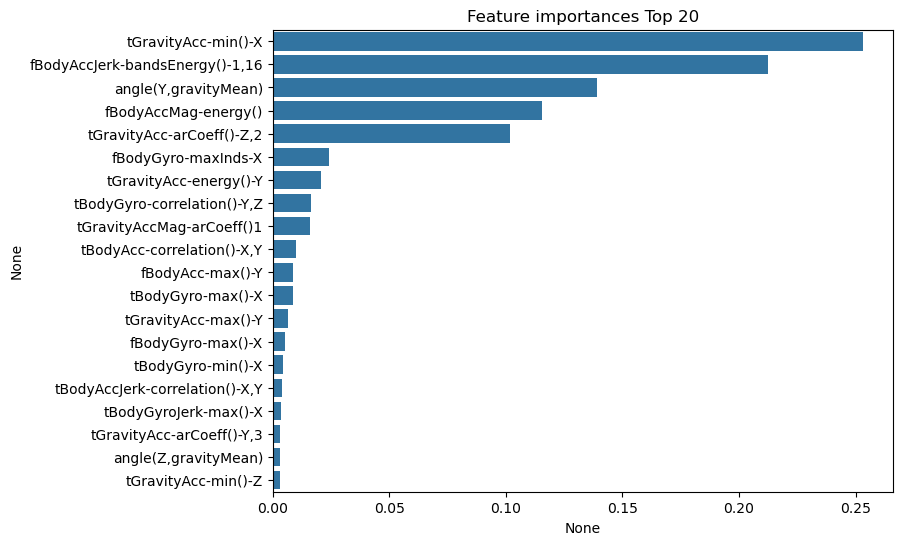

In [21]:
import seaborn as sns

ftr_importance_values = best_dt_clf.feature_importances_ # 리스트 형태로 컬럼별 중요도를 0<=x<1의 값으로 표현
ftr_importance = pd.Series(ftr_importance_values,index=X_train.columns)

ftr_top20 = ftr_importance.sort_values(ascending=False)[:20]
plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20,y=ftr_top20.index)
plt.show()

# 위스콘신 유방암 데이터 세트
- 보팅분류기 사용

In [22]:
import pandas as pd
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cancer = load_breast_cancer()

data_df = pd.DataFrame(cancer.data, columns = cancer.feature_names)
data_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [23]:
lr_clf = LogisticRegression(solver= 'liblinear')
knn_clf = KNeighborsClassifier(n_neighbors=8)

vo_clf = VotingClassifier(estimators=[('LR',lr_clf),('KNN',knn_clf)],voting='soft')

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                    test_size=0.2,random_state=156)

vo_clf.fit(X_train,y_train)
pred = vo_clf.predict(X_test)
print('Voting 분류기 정확도 : {0:.4f}'.format(accuracy_score(y_test,pred)))
      
classifiers = [lr_clf, knn_clf]
for classifier in classifiers:
    classifier.fit(X_train,y_train)
    pred= classifier.predict(X_test)
    class_name = classifier.__class__.__name__ # 분류기 이름
    print('{0} 정확도 : {1:.4f}'.format(class_name, accuracy_score(y_test,pred)))

Voting 분류기 정확도 : 0.9561
LogisticRegression 정확도 : 0.9474
KNeighborsClassifier 정확도 : 0.9386


# 랜덤포레스트 실습

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

X_train,X_test,y_train,y_test = get_human_dataset()

rf_clf = RandomForestClassifier(random_state=0,max_depth=8) # 기본 결정트리를 사용
rf_clf.fit(X_train,y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test,pred)
print('랜덤포레스트 정확도: {0:.4f}'.format(accuracy))

랜덤포레스트 정확도: 0.9196


In [29]:
# 하이퍼 파라미터 튜닝
from sklearn.model_selection import GridSearchCV

params = {'max_depth':[8,16,24],
          'min_samples_leaf':[1,6,12],
          'min_samples_split':[2,8,16]}

rf_clf = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs = -1)
grid_cv = GridSearchCV(rf_clf, param_grid=params, cv=2, n_jobs=-1)
grid_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

/Users/seojeongsik/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/seojeongsik/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/seojeongsik/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/seojeongsik/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: Future

최적 하이퍼 파라미터:
 {'max_depth': 16, 'min_samples_leaf': 6, 'min_samples_split': 2}
최고 예측 정확도: 0.9165


In [30]:
rf_clf1 = RandomForestClassifier(n_estimators=100, min_samples_leaf=6,max_depth=16,
                                min_samples_split=2,random_state=0)
rf_clf1.fit(X_train,y_train)
pred = rf_clf1.predict(X_test)
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test,pred)))

예측 정확도: 0.9260


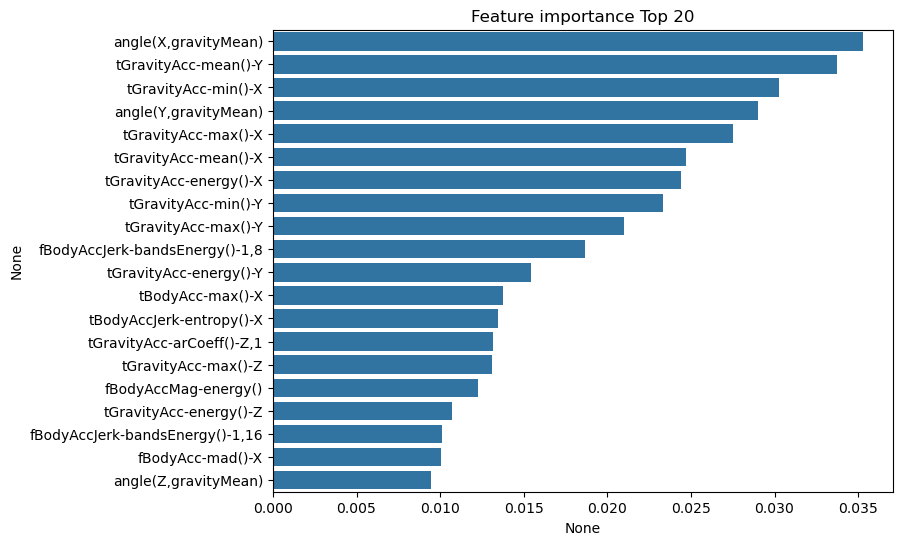

In [31]:
# rf에서도 feature_importance_를 사용가능
# rf는 기본적으로 결정트리를 사용
import matplotlib.pyplot as plt
import seaborn as sns

ftr_importance_values = rf_clf1.feature_importances_
ftr_importance = pd.Series(ftr_importance_values, index = X_train.columns)
ftr_top20 = ftr_importance.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature importance Top 20')
sns.barplot(x=ftr_top20,y=ftr_top20.index)
plt.show()

# GBM
- 부스팅은 점진적으로 개선

In [32]:
from sklearn.ensemble import GradientBoostingClassifier
import time
import warnings
warnings.filterwarnings('ignore')

X_train,X_test,y_train,y_test = get_human_dataset()

start_time = time.time() # 시작 시간

gb_clf = GradientBoostingClassifier(random_state=0)
gb_clf.fit(X_train,y_train)
gb_pred = gb_clf.predict(X_test)
gb_accuracy = accuracy_score(y_test,gb_pred)

print('GBM 정확도 : {0:.4f}'.format(gb_accuracy))
print('GBM 수행 시간 : {0:.1f}'.format(time.time()-start_time))


GBM 정확도 : 0.9393
GBM 수행 시간 : 546.6


# XGBoost

In [34]:
# pip install xgboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 2.5 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [4]:
import xgboost as xgb
from xgboost import XGBClassifier
xgboost.__version__

'2.0.3'

## XGB_위스콘신 유방암 예측
- 파이썬 기반

In [6]:
import xgboost as xgb
from xgboost import plot_importance
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

dataset = load_breast_cancer()
features = dataset.data
labels = dataset.target
cancer_df = pd.DataFrame(data=features,columns = dataset.feature_names)
cancer_df['target'] = labels
cancer_df.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [7]:
# 분류 타겟값은 value_counts()를 통해 분포를 확인하는 것이 필요
print(dataset.target_names)
print(cancer_df['target'].value_counts())

['malignant' 'benign']
target
1    357
0    212
Name: count, dtype: int64


In [8]:
X_feature = cancer_df.iloc[:,:-1]
y_label = cancer_df.iloc[:,-1]

X_train,X_test,y_train,y_test = train_test_split(X_feature,y_label,test_size=0.2,random_state=156)

# 검증
X_tr,X_val,y_tr,y_val = train_test_split(X_train,y_train,test_size=0.1,random_state=156)

print(X_train.shape, X_test.shape)
print(X_tr.shape,X_val.shape)

(455, 30) (114, 30)
(409, 30) (46, 30)


In [9]:
# DMatirx로 변환
dtr = xgb.DMatrix(data=X_tr, label = y_tr)
dval = xgb.DMatrix(data=X_val, label = y_val)
dtest = xgb.DMatrix(data=X_test, label = y_test)


In [11]:
params = {'max_depth' : 3,
          'eta' : 0.05,
          'objective' : 'binary:logistic',
          'eval_metric' : 'logloss'}
num_rounds = 400

eval_list = [(dtr,'train'),(dval,'eval')]

xgb_model = xgb.train(params = params, dtrain=dtr, num_boost_round= num_rounds,
                      early_stopping_rounds = 50, evals=eval_list)



[0]	train-logloss:0.62480	eval-logloss:0.63104
[1]	train-logloss:0.58674	eval-logloss:0.60478
[2]	train-logloss:0.55226	eval-logloss:0.58223
[3]	train-logloss:0.52086	eval-logloss:0.56184
[4]	train-logloss:0.49192	eval-logloss:0.54118
[5]	train-logloss:0.46537	eval-logloss:0.52223
[6]	train-logloss:0.44029	eval-logloss:0.50287
[7]	train-logloss:0.41666	eval-logloss:0.48620
[8]	train-logloss:0.39525	eval-logloss:0.46974
[9]	train-logloss:0.37542	eval-logloss:0.45497
[10]	train-logloss:0.35701	eval-logloss:0.44131
[11]	train-logloss:0.33982	eval-logloss:0.43134
[12]	train-logloss:0.32297	eval-logloss:0.41972
[13]	train-logloss:0.30725	eval-logloss:0.40902
[14]	train-logloss:0.29327	eval-logloss:0.39883
[15]	train-logloss:0.27946	eval-logloss:0.38968
[16]	train-logloss:0.26691	eval-logloss:0.38150
[17]	train-logloss:0.25473	eval-logloss:0.37368
[18]	train-logloss:0.24385	eval-logloss:0.36666
[19]	train-logloss:0.23338	eval-logloss:0.35994
[20]	train-logloss:0.22320	eval-logloss:0.35374
[2

In [12]:
pred_probs = xgb_model.predict(dtest)
print(np.round(pred_probs[:10],3))

preds = [1 if x>0.5 else 0 for x in pred_probs]
print(preds[:10])

[0.938 0.004 0.75  0.049 0.98  1.    0.999 0.999 0.998 0.001]
[1, 0, 1, 0, 1, 1, 1, 1, 1, 0]


In [23]:
from sklearn.metrics import confusion_matrix, accuracy_score,precision_score,recall_score,f1_score,roc_auc_score
def get_clf_eval(y_test, pred=None, pred_proba=None): 
    confusion = confusion_matrix(y_test, pred) 
    accuracy = accuracy_score(y_test, pred) 
    precision = precision_score(y_test, pred) 
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test,pred) 
    #ROC-AUC 추가
    roc_auc = roc_auc_score(y_test, pred_proba) 
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:f}, 정밀도: {1:4f}, 재현율: {2:4f},\
    F1: {3:.4f}, AUC:{4:4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [24]:
get_clf_eval(y_test,preds,pred_probs)

오차 행렬
[[35  2]
 [ 2 75]]
정확도: 0.964912, 정밀도: 0.974026, 재현율: 0.974026,    F1: 0.9740, AUC:0.996490


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.


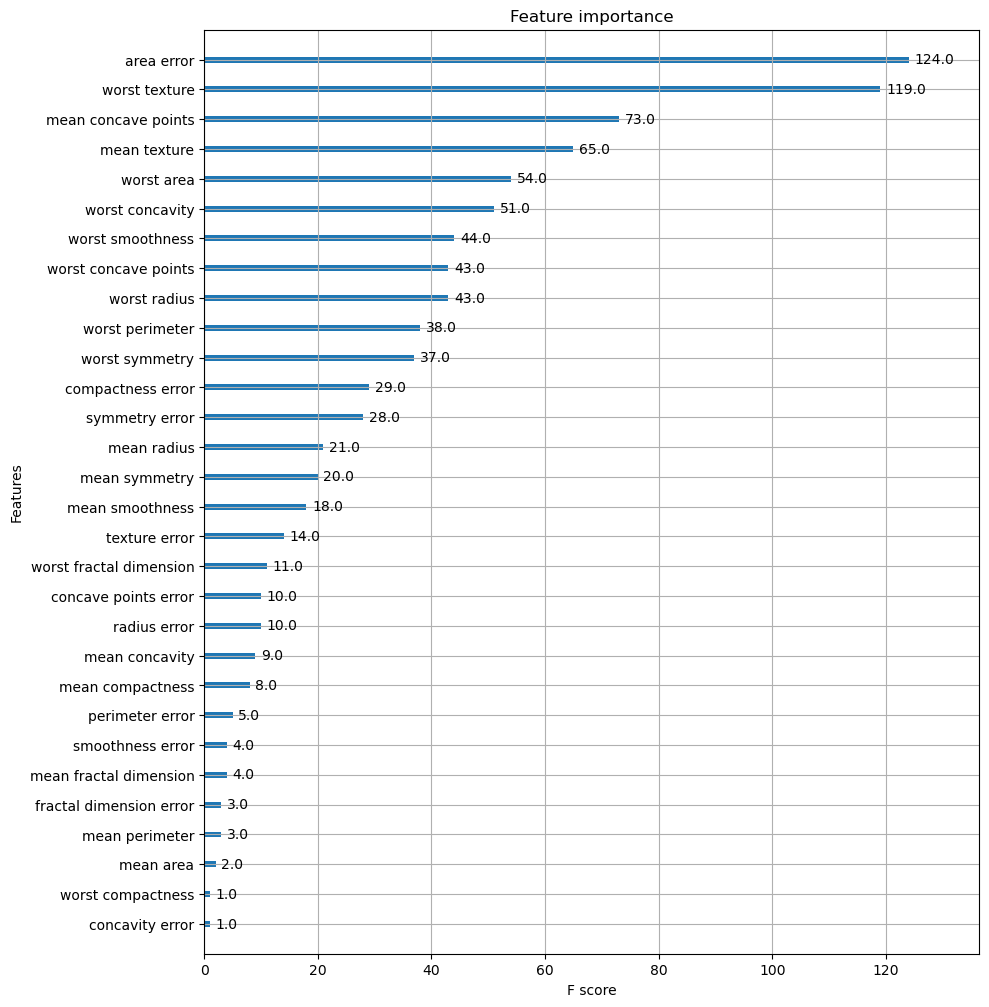

In [25]:
import matplotlib.pyplot as plt

fig,axes = plt.subplots(figsize=(10,12))
plot_importance(xgb_model,axes)

## 사이킷런 래퍼 XGBoost의 개요 및 적용


In [27]:
from xgboost import XGBClassifier

# val 데이터없이, 조기중단 없이 실행
xgb_wrapper = XGBClassifier(n_estimators = 400, learning_rate = 0.05, max_depth = 3,
                            eval_metric = 'logloss')
xgb_wrapper.fit(X_train,y_train, verbose = True)
w_preds = xgb_wrapper.predict(X_test)
w_pred_proba = xgb_wrapper.predict_proba(X_test)[:,1]

get_clf_eval(y_test,w_preds,w_pred_proba)

오차 행렬
[[35  2]
 [ 1 76]]
정확도: 0.973684, 정밀도: 0.974359, 재현율: 0.987013,    F1: 0.9806, AUC:0.995437


In [30]:
from xgboost import XGBClassifier

# val 데이터 입력, 조기중단 옵션 입력
# 자체 내장된 교차 검증
xgb_wrapper = XGBClassifier(n_estimators=400,learning_rate=0.05,max_depth=3)
evals = [(X_tr,y_tr),(X_val,y_val)] # 성능평가 데이터 셋
xgb_wrapper.fit(X_tr,y_tr,early_stopping_rounds=50,eval_metric='logloss',
                eval_set=evals,verbose=True)
ws50_preds = xgb_wrapper.predict(X_test)
ws50_pred_proba = xgb_wrapper.predict_proba(X_test)[:,1]

[0]	validation_0-logloss:0.62480	validation_1-logloss:0.63104


[1]	validation_0-logloss:0.58674	validation_1-logloss:0.60478
[2]	validation_0-logloss:0.55226	validation_1-logloss:0.58223
[3]	validation_0-logloss:0.52086	validation_1-logloss:0.56184
[4]	validation_0-logloss:0.49192	validation_1-logloss:0.54118
[5]	validation_0-logloss:0.46537	validation_1-logloss:0.52223
[6]	validation_0-logloss:0.44029	validation_1-logloss:0.50287
[7]	validation_0-logloss:0.41666	validation_1-logloss:0.48620
[8]	validation_0-logloss:0.39525	validation_1-logloss:0.46974
[9]	validation_0-logloss:0.37542	validation_1-logloss:0.45497
[10]	validation_0-logloss:0.35701	validation_1-logloss:0.44131
[11]	validation_0-logloss:0.33982	validation_1-logloss:0.43134
[12]	validation_0-logloss:0.32297	validation_1-logloss:0.41972
[13]	validation_0-logloss:0.30725	validation_1-logloss:0.40902
[14]	validation_0-logloss:0.29327	validation_1-logloss:0.39883
[15]	validation_0-logloss:0.27946	validation_1-logloss:0.38968
[16]	validation_0-logloss:0.26691	validation_1-logloss:0.38150
[

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

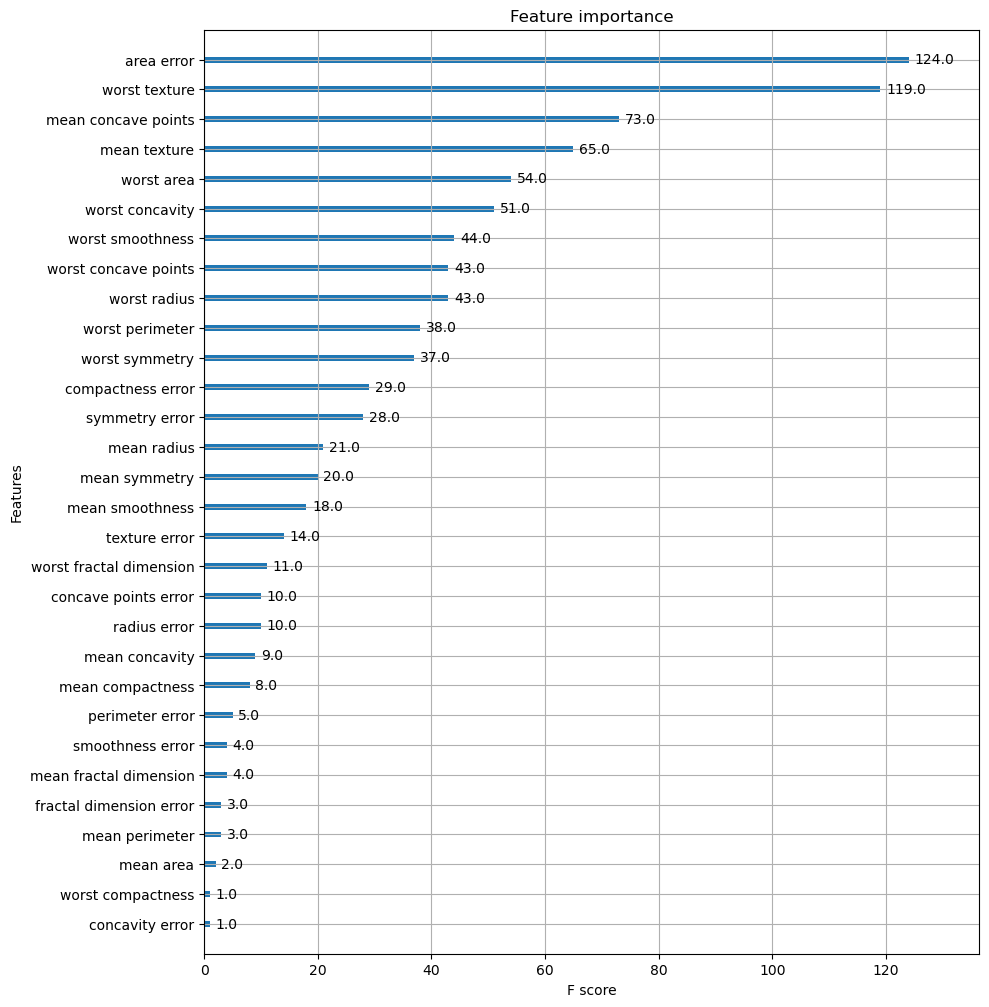

In [31]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

fig,axes = plt.subplots(figsize=(10,12))
plot_importance(xgb_wrapper,ax=axes)

# LightGBM
- 파이썬

In [37]:
pip install lightgbm==3.3.2

Note: you may need to restart the kernel to use updated packages.


In [38]:
# LightGBM의 파이썬 패키지인 lightgbm에서 LGBMClassifier 임포트 
from lightgbm import LGBMClassifier
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

dataset = load_breast_cancer()

cancer_df = pd.DataFrame(data = dataset.data, columns=dataset.feature_names)
cancer_df['target']= dataset.target 
X_features = cancer_df.iloc[:, :-1] 
y_label = cancer_df.iloc[:, -1]

# 전체 데이터 중 80%는 학습용 데이터, 20%는 테스트용 데이터 추출
X_train, X_test, y_train, y_test=train_test_split(X_features, y_label, test_size=0.2, random_state=156)

# 위에서 만든 X_train, y_train을 다시 쪼개서 90%는 학습과 10%는 검증용 데이터로 분리
X_tr, X_val, y_tr, y_val= train_test_split(X_train, y_train, test_size=0.1, random_state=156)

# 앞서 XGBoost와 동일하게 n_estimators는 400 설정.
lgbm_wrapper = LGBMClassifier(n_estimators=400, learning_rate=0.05)

# LightGBM도 XGBoost와 동일하게 조기 중단 수행 가능.
evals = [(X_tr, y_tr), (X_val, y_val)]
lgbm_wrapper.fit(X_tr, y_tr, early_stopping_rounds=50, eval_metric="logloss",
                 eval_set=evals, verbose=True) 
preds = lgbm_wrapper.predict(X_test)
pred_proba = lgbm_wrapper.predict_proba(X_test)[:, 1]

get_clf_eval(y_test,preds,pred_proba)

OSError: dlopen(/Users/seojeongsik/opt/anaconda3/lib/python3.9/site-packages/lightgbm/lib_lightgbm.so, 0x0006): Library not loaded: /usr/local/opt/libomp/lib/libomp.dylib
  Referenced from: <FB7AB1B4-24FD-362B-99F0-01E20F36C929> /Users/seojeongsik/opt/anaconda3/lib/python3.9/site-packages/lightgbm/lib_lightgbm.so
  Reason: tried: '/usr/local/opt/libomp/lib/libomp.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/usr/local/opt/libomp/lib/libomp.dylib' (no such file), '/usr/local/opt/libomp/lib/libomp.dylib' (no such file), '/usr/local/lib/libomp.dylib' (no such file), '/usr/lib/libomp.dylib' (no such file, not in dyld cache)

In [36]:
from lightgbm import plot_importance
import matplotlib.pyplot as plt

fig,axes = plt.subplots(figsize=(10,12))
plot_importance(lgbm_wrapper, ax=axes)

NameError: name 'lightgbm' is not defined

# HyperOpt 사용
- 베이지안 최적화

In [39]:
# pip install hyperopt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 5.4 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [40]:
from hyperopt import hp
# 입력 변수명과 입력값의 검색공간을 설정
search_space = {'x':hp.quniform('x',-10,10,1), 'y':hp.quniform('y',-15,15,1)}
# hp.uniform

In [41]:
# 목적함수를 생성
from hyperopt import STATUS_OK

def objective_func(search_space):
    x = search_space['x']
    y = search_space['y']
    retval = x**2 - 20*y
    
    return retval

In [42]:
# 베이지안 최적화 기법에 기반
from hyperopt import fmin,tpe,Trials

# 입력 결과값을 저장한 Trials 객체값 생성
trial_val = Trials()

best_01 = fmin(fn=objective_func, space = search_space, algo=tpe.suggest, 
               max_evals=5, trials = trial_val,rstate=np.random.default_rng(seed=0))
print('best:',best_01)

100%|██████████| 5/5 [00:00<00:00, 100.27trial/s, best loss: -224.0]
best: {'x': -4.0, 'y': 12.0}


In [45]:
trial_val = Trials()

best_02 = fmin(fn=objective_func,space=search_space,algo=tpe.suggest,
               max_evals=20,trials=trial_val,rstate=np.random.default_rng(seed=0))
print('best:',best_02)

100%|██████████| 20/20 [00:00<00:00, 377.93trial/s, best loss: -296.0]
best: {'x': 2.0, 'y': 15.0}


In [46]:
print(trial_val.results)

[{'loss': -64.0, 'status': 'ok'}, {'loss': -184.0, 'status': 'ok'}, {'loss': 56.0, 'status': 'ok'}, {'loss': -224.0, 'status': 'ok'}, {'loss': 61.0, 'status': 'ok'}, {'loss': -296.0, 'status': 'ok'}, {'loss': -40.0, 'status': 'ok'}, {'loss': 281.0, 'status': 'ok'}, {'loss': 64.0, 'status': 'ok'}, {'loss': 100.0, 'status': 'ok'}, {'loss': 60.0, 'status': 'ok'}, {'loss': -39.0, 'status': 'ok'}, {'loss': 1.0, 'status': 'ok'}, {'loss': -164.0, 'status': 'ok'}, {'loss': 21.0, 'status': 'ok'}, {'loss': -56.0, 'status': 'ok'}, {'loss': 284.0, 'status': 'ok'}, {'loss': 176.0, 'status': 'ok'}, {'loss': -171.0, 'status': 'ok'}, {'loss': 0.0, 'status': 'ok'}]


In [47]:
print(trial_val.vals)

{'x': [-6.0, -4.0, 4.0, -4.0, 9.0, 2.0, 10.0, -9.0, -8.0, -0.0, -0.0, 1.0, 9.0, 6.0, 9.0, 2.0, -2.0, -4.0, 7.0, -0.0], 'y': [5.0, 10.0, -2.0, 12.0, 1.0, 15.0, 7.0, -10.0, 0.0, -5.0, -3.0, 2.0, 4.0, 10.0, 3.0, 3.0, -14.0, -8.0, 11.0, -0.0]}


In [48]:
import pandas as pd
# 해당 값들을 DataFrame 형태로 정리
losses = [loss_dict['loss'] for loss_dict in trial_val.results]

result_df = pd.DataFrame({'x':trial_val.vals['x'],'y':trial_val.vals['y'],'losses':losses})
result_df

,x,y,losses
0,-6.0,5.0,-64.0
1,-4.0,10.0,-184.0
2,4.0,-2.0,56.0
3,-4.0,12.0,-224.0
4,9.0,1.0,61.0
5,2.0,15.0,-296.0
6,10.0,7.0,-40.0
7,-9.0,-10.0,281.0
8,-8.0,0.0,64.0
9,-0.0,-5.0,100.0


## HyperOpt를 이용한 XGBoost 하이퍼 파라미터 최적화

In [2]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

dataset = load_breast_cancer()

cancer_df = pd.DataFrame(data = dataset.data, columns=dataset.feature_names)
cancer_df['target']= dataset.target 
X_features = cancer_df.iloc[:, :-1] 
y_label = cancer_df.iloc[:, -1]

X_train,X_test,y_train,y_test = train_test_split(X_features,y_label, test_size=0.2,random_state=156)
X_tr,X_val,y_tr,y_val = train_test_split(X_train,y_train, test_size=0.2,random_state=156)


In [3]:
from hyperopt import hp

xgb_search_space = {'max_depth':hp.quniform('max_depth',5,20,1),
                    'min_child_weight':hp.quniform('min_child_weight',1,2,1),
                    'learning_rate':hp.uniform('learning_rate',0.01,0.2),
                    'colsample_bytree':hp.uniform('colsample_bytree',0.5,1)}

In [4]:
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
from hyperopt import STATUS_OK

def objective_func(search_space):
    xgb_clf = XGBClassifier(n_estimators=100, 
                            max_depth=int(search_space['max_depth']),
                            min_child_weight = int(search_space['min_child_weight']),
                            learning_rate = search_space['learning_rate'],
                            colsample_bytree = search_space['colsample_bytree'],
                            eval_metric = 'logloss')
    accuracy = cross_val_score(xgb_clf,X_train,y_train,scoring='accuracy',cv=3)
    # fmin은 낮은 수치를 최적화한다.
    return {'loss':-1 * np.mean(accuracy), 'status':STATUS_OK}
                            

In [6]:
from hyperopt import fmin,tpe,Trials

trial_val = Trials()
best = fmin(fn=objective_func,
            space = xgb_search_space,
            algo=tpe.suggest,
            max_evals=50,
            trials = trial_val, rstate = np.random.default_rng(seed=9))
print('best:',best)

  0%|          | 0/50 [00:00<?, ?trial/s, best loss=?]

100%|██████████| 50/50 [00:08<00:00,  5.99trial/s, best loss: -0.9692546764261647]
best: {'colsample_bytree': 0.6296639836459481, 'learning_rate': 0.16960815502434487, 'max_depth': 15.0, 'min_child_weight': 2.0}


In [7]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [8]:
xgb_wrapper = XGBClassifier(n_estimator = 400,
                            learning_rate = round(best['learning_rate'],5),
                            max_depth = int(best['max_depth']),
                            min_child_weight = int(best['min_child_weight']),
                            colsample_bytree = round(best['colsample_bytree'],5)
                            )
evals = [(X_tr,y_tr),(X_val,y_val)]
xgb_wrapper.fit(X_tr,y_tr,
                early_stopping_rounds=50,
                eval_metric='logloss',
                eval_set=evals,
                verbose=True
                )
preds = xgb_wrapper.predict(X_test)
pred_proba = xgb_wrapper.predict_proba(X_test)[:,1]

get_clf_eval(y_test,preds,pred_proba)

[0]	validation_0-logloss:0.52507	validation_1-logloss:0.58195
[1]	validation_0-logloss:0.43154	validation_1-logloss:0.50343
[2]	validation_0-logloss:0.36082	validation_1-logloss:0.44331
[3]	validation_0-logloss:0.30613	validation_1-logloss:0.39715
[4]	validation_0-logloss:0.26300	validation_1-logloss:0.36003
[5]	validation_0-logloss:0.22631	validation_1-logloss:0.33198
[6]	validation_0-logloss:0.19555	validation_1-logloss:0.31225
[7]	validation_0-logloss:0.17087	validation_1-logloss:0.29679
[8]	validation_0-logloss:0.15174	validation_1-logloss:0.27954
[9]	validation_0-logloss:0.13411	validation_1-logloss:0.26564
[10]	validation_0-logloss:0.11970	validation_1-logloss:0.25761
[11]	validation_0-logloss:0.10613	validation_1-logloss:0.24633
[12]	validation_0-logloss:0.09457	validation_1-logloss:0.24078
[13]	validation_0-logloss:0.08539	validation_1-logloss:0.23648
[14]	validation_0-logloss:0.07698	validation_1-logloss:0.23544
[15]	validation_0-logloss:0.07084	validation_1-logloss:0.23422


/Users/seojeongsik/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/Users/seojeongsik/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/seojeongsik/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [01:17:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[16]	validation_0-logloss:0.06471	validation_1-logloss:0.22816
[17]	validation_0-logloss:0.06049	validation_1-logloss:0.22648
[18]	validation_0-logloss:0.05666	validation_1-logloss:0.22414
[19]	validation_0-logloss:0.05296	validation_1-logloss:0.22583
[20]	validation_0-logloss:0.04949	validation_1-logloss:0.22325
[21]	validation_0-logloss:0.04631	validation_1-logloss:0.22444
[22]	validation_0-logloss:0.04384	validation_1-logloss:0.22566
[23]	validation_0-logloss:0.04125	validation_1-logloss:0.22397
[24]	validation_0-logloss:0.03896	validation_1-logloss:0.22216
[25]	validation_0-logloss:0.03717	validation_1-logloss:0.22406
[26]	validation_0-logloss:0.03561	validation_1-logloss:0.22591
[27]	validation_0-logloss:0.03407	validation_1-logloss:0.22251
[28]	validation_0-logloss:0.03282	validation_1-logloss:0.22489
[29]	validation_0-logloss:0.03163	validation_1-logloss:0.22199
[30]	validation_0-logloss:0.03048	validation_1-logloss:0.22160
[31]	validation_0-logloss:0.02940	validation_1-logloss: